In [1]:
import pandas as pd
import numpy as np
import random, os, sys 
from groo.groo import get_root
import matplotlib.pyplot as plt

os.path.join(get_root(".tasks_root"))

ids = ["XjK2mTp0", "vMe2FJk1", "cLr2qXf2", "TXp4tLJ3", "aXv2dCm0", "mFs2tQj1"]
ii = 4
schid = 0
main2 = "r2"


In [2]:
data = pd.read_json(os.path.join(get_root(".tasks_root"), "contextual-inference", "data", ids[ii]+"_r3_main1_"+str(schid)+".json"))
data2 = pd.read_json(os.path.join(get_root(".tasks_root"), "contextual-inference", "data", ids[ii]+"_"+main2+"_main2_"+str(schid)+".json"))

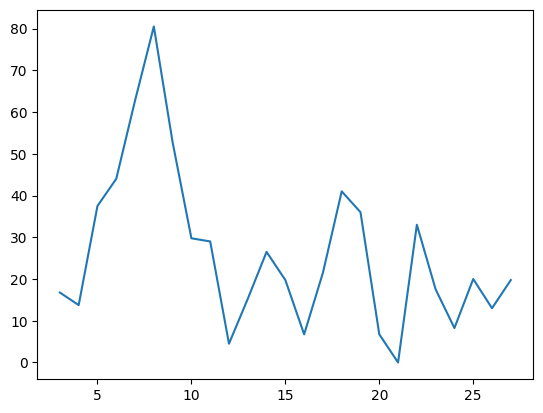

In [3]:


rdf = pd.DataFrame()
for cidx, c in enumerate(["r3", main2]):
    data = pd.read_json(os.path.join(get_root(".tasks_root"), "contextual-inference", "data", ids[ii]+"_"+c+"_main"+str(cidx+1)+"_"+str(schid)+".json"))
    rat = data.loc[(data["require_rating"]==1) & (data["decision"]==0),["target", "outcome", "t1_ev", "t2_ev", "rating", "t_slider_shown", "t_response_made"]]
    rat["RT"]  = rat["t_response_made"] - rat["t_slider_shown"]
    #rat["totalRT"]  = rat["t_response_made"] - rat["t_slider_shown"]
    #rat["delibrationRT"] = rat["initRT"]/rat["totalRT"] 

    rat["err"] = rat["outcome"] - rat["rating"]
    
    rdf = pd.concat([rdf, rat])
rdf["running_err"] = rdf["err"].rolling(4).mean().abs()
rdf= rdf.reset_index()
plt.plot(rdf.index, rdf["running_err"])

### Check final data structure and document variables

0.4117647058823529
0.5384615384615384
1.0
0.8823529411764706


FileNotFoundError: File /data/drive/postdoc/grants/resources/tasks-and-sims-for-grants/contextual-inference/data/aXv2dCm0_r3_main1_4.json does not exist

In [ ]:
chdata

,target,outcome,t1_ev,t2_ev,choice,t_ch_targets_shown,t_ch_choice_made,rt,correctch,accuracy
15,1.0,-16.0,-15.0,5.0,1.0,754388.4,757597.7,3209.3,2,0
16,1.0,-41.0,-40.0,20.0,2.0,765293.3,767565.5,2272.2,2,1
23,2.0,21.0,-40.0,20.0,2.0,827488.7,829509.6,2020.9,2,1
29,2.0,27.0,-15.0,25.0,2.0,890234.2,891453.7,1219.5,2,1
32,1.0,-13.0,-15.0,25.0,2.0,916563.4,917958.3,1394.9,2,1
34,2.0,-13.0,25.0,-15.0,1.0,934354.2,936141.7,1787.5,1,1
36,2.0,18.0,-40.0,20.0,2.0,952546.0,953293.7,747.7,2,1
39,2.0,-13.0,25.0,-15.0,1.0,989513.3,991381.8,1868.5,1,1
45,1.0,-10.0,-15.0,5.0,1.0,1052892.3,1058973.7,6081.4,2,0
46,1.0,24.0,25.0,-15.0,1.0,1066664.5,1069014.0,2349.5,1,1


In [ ]:
data = pd.read_json(os.path.join(get_root(".tasks_root"), "contextual-inference", "data", "bbb2aaa2_r3_main1_2_test.json"))
data

,,index,tr_id,no_rel_ctxts,target,rel_cond,correct_stim,no_shown,relevance_stim1,relevance_stim2,...,mouse_time,mouse_xpos,mouse_ypos,t_ch_cosmic_particle_start,t_ch_targets_shown,t_ch_choice_made,t_slider_shown,t_response_made,t_slider_removed,relevant_chosen
0,0,0.0,2.0,3.0,2.0,rel3,2.0,2.0,rel,irr,...,"[96446.60000002384, 96496.5, 96546.5, 96596.5,...","[552.1739130434783, 552.1739130434783, 552.173...","[490.6832298136646, 490.6832298136646, 490.683...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.0,3.0,3.0,1.0,rel3,2.0,2.0,rel,rel,...,"[105297.90000003576, 105348, 105397.8000000119...","[552.1739130434783, 552.1739130434783, 552.173...","[490.6832298136646, 490.6832298136646, 490.683...",107633.1,108001.1,109656.0,NaN,NaN,NaN,NaN
2,2,2.0,1.0,3.0,1.0,rel3,2.0,2.0,rel,rel,...,"[114722.90000003576, 114773, 114822.9000000357...","[68.32298136645962, 68.32298136645962, 68.3229...","[257.76397515527947, 257.76397515527947, 257.7...",NaN,NaN,NaN,118443.5,119398.6,119399.1,NaN
3,3,3.0,4.0,3.0,2.0,rel3,2.0,2.0,irr,rel,...,"[124482.60000002384, 124532.19999998808, 12458...","[247.20496894409936, 247.20496894409936, 247.2...","[511.8012422360248, 511.8012422360248, 511.801...",NaN,NaN,NaN,128201.7,141037.7,141038.2,NaN
4,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
